In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv(r"E:\MLIoT\ML\dataset\Anomaly Detection\Old_age_infection.csv")
df.shape

(331, 4)

In [3]:
df.head()

,Patient ID,Age,Infection_chances,Abnormality
0,1,39,0.827441,0
1,2,34,0.166533,0
2,3,33,0.806247,0
3,4,61,0.278224,0
4,5,64,0.238449,0


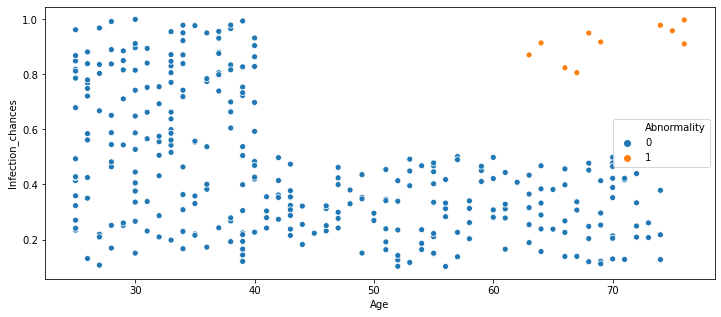

In [5]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Infection_chances',hue='Abnormality',data=df)
plt.show()

## Preprocessing

In [7]:
df.head()

,Patient ID,Age,Infection_chances,Abnormality
0,1,39,0.827441,0
1,2,34,0.166533,0
2,3,33,0.806247,0
3,4,61,0.278224,0
4,5,64,0.238449,0


In [8]:
x = df[['Age','Infection_chances']]

# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

### Anomaly Detection using Isolation Forest

In [34]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=100,contamination=0.03,max_samples=0.3,verbose=True)
model.fit(x)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


IsolationForest(contamination=0.03, max_samples=0.3, verbose=True)

In [38]:
model.estimators_samples_

[array([ 42, 164, 178, 129,  32,  92,  54,  76, 292, 194, 188, 133, 157,
        122, 104, 197, 176, 100, 245,  82, 125,  37, 272,  77,  13, 106,
        173, 206,  31, 116,  97, 259, 124,  19, 127, 151, 179, 321, 238,
        132, 183, 131,  62, 112,  64,  72, 234,  36, 251, 154,  11, 282,
        190,  38,  65, 153, 298, 239,  68,  69, 275, 236, 169, 327, 119,
        105,  98, 289, 117, 324, 135, 108, 101, 330, 300, 152,  81, 306,
        277, 174,  73, 136, 319, 287,  34, 175, 232,  24, 107, 220,  12,
        130,  16, 267,  91,  14, 202, 303, 329]),
 array([221,  27, 251, 310,  97, 259, 197, 249, 131,   0, 256,  10, 273,
         90,  62, 265, 210, 123, 231, 198, 156,  64, 158,  78, 112, 304,
        307,  94, 176, 300, 283, 163, 279,  98, 288, 196, 190, 306, 235,
        183, 276, 146, 301, 278, 229,  31, 227,   6,  11, 103, 213, 296,
         15, 316,  86, 216, 286,  26,  22, 261, 244, 220,  47, 170, 100,
          9, 323,  34, 127,  43, 111, 324,  12, 298, 267, 107,  37, 264,
 

In [44]:
model.score_samples(x)

array([-0.50403392, -0.5315922 , -0.48946645, -0.47971541, -0.48785757,
       -0.47715408, -0.47415427, -0.50572962, -0.52697791, -0.55652812,
       -0.53401603, -0.51623316, -0.50939034, -0.51494574, -0.53338361,
       -0.49773113, -0.47967838, -0.49898208, -0.50414058, -0.49145986,
       -0.53505123, -0.54421612, -0.46804105, -0.51145125, -0.48706633,
       -0.54400901, -0.50274928, -0.53417957, -0.5172213 , -0.49606802,
       -0.49273866, -0.47523754, -0.46829789, -0.61032011, -0.49994624,
       -0.52825862, -0.4994712 , -0.51244471, -0.52049927, -0.5398358 ,
       -0.52819677, -0.46942915, -0.51322507, -0.52127665, -0.48618978,
       -0.47645958, -0.49319764, -0.46670035, -0.46969493, -0.54742956,
       -0.55805939, -0.49678625, -0.48739308, -0.52389433, -0.48311141,
       -0.5243651 , -0.4667332 , -0.52706495, -0.54334192, -0.50932805,
       -0.56614829, -0.50473533, -0.48208118, -0.55266274, -0.51505211,
       -0.54181284, -0.49286657, -0.49398292, -0.48611563, -0.48

In [31]:
model.predict(sc.transform([[65,0.1]]))

array([1])

In [32]:
ypred =  np.where(model.predict(x)==1,0,1)

In [33]:
df['Predictions'] = ypred
pd.crosstab(df['Abnormality'],df['Predictions'])

Predictions,0,1
Abnormality,,
0,321,0
1,0,10


In [ ]:
# False Positive high? OR False Negative ?